# 2 Flows on the line
---

**Overview**

- [2.0 Introduction](#2.0-Introduction)

## 2.0 Introduction
---

$$
\begin{align*}
\dot{x}_1 &= f_1(x_1, \cdots, x_n) \\
& \vdots \\
\dot{x}_n &= f_n(x_1, \cdots, x_n)
\end{align*}
$$

$n = 1$

$$\dot{x} = f(x)$$

**one-dimensinal** / **first-order system**


## 2.1 A Geometric way of Thinking
---

$$\dot{x} = \sin x$$
(1)

$$dt = \frac{dx}{\sin x}$$

implies: 
$$
\begin{align*}
t &= \int \csc x \, \mathrm{d}x \\
&= - \ln |\csc x + \cot x | + C
\end{align*}
$$

$$t = \ln \Big|\frac{\csc x_0 + \cot x_0}{\csc x + \cot x}\Big|$$
(2)



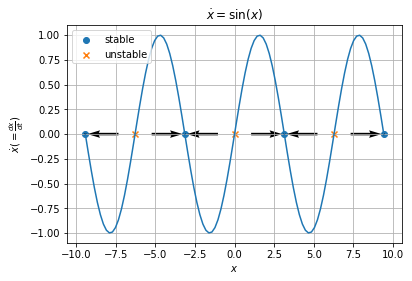

In [1]:
import matplotlib.pyplot as plt
import numpy as np

pi = np.pi

def fn(x):
    y = np.sin(x)
    return y

x = np.linspace(-pi*3, pi*3, num=100)
x_dot = fn(x)
plt.plot(x, x_dot)

stable = np.arange(-pi*3, pi*4, pi*2)
plt.scatter(stable, fn(stable), marker='o', label='stable')

unstable = np.arange(-pi*2, pi*3, pi*2)
plt.scatter(unstable, fn(unstable), marker='x', label='unstable')


# flow_pos = np.arange(-pi*3/2, pi*7/2, pi*2)
# plt.scatter(flow_pos, np.repeat(0, len(flow_pos)), marker='>', c='darkblue')

# flow_neg = np.arange(-pi*5/2, pi*5/2, pi*2)
# plt.scatter(flow_neg, np.repeat(0, len(flow_neg)), marker='<', c='darkblue')

x_flow = np.linspace(-pi*3, pi*3, 10)
y_flow = np.repeat(0, len(x_flow))
l_flow = fn(x_flow)
plt.quiver(x_flow, y_flow, l_flow, 0)
            
plt.title(r'$\dot{x} = \sin(x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$\dot{x} (= \frac{dx}{dt})$')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

**fixed point**
- **stable**
- **unstable**

## 2.2 Fixed Points and Stability

- **phase point**: imaginary point
- **phase portrait**: qualitatively different trajectories

### Example 2.2.1

$$\dot{x} = x^2 - 1$$

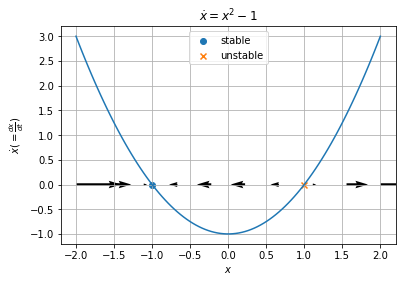

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def fn(x):
    y = x**2 - 1
    return y

x = np.linspace(-2, 2, 100)
x_dot = fn(x)

stable = -1
plt.scatter(stable, fn(stable), label='stable', marker='o')

unstable = 1
plt.scatter(unstable, fn(unstable), label='unstable', marker='x')

x_flow = np.linspace(-2, 2, 10)
y_flow = np.repeat(0, len(x_flow))
l_flow = fn(x_flow)
plt.quiver(x_flow, y_flow, l_flow, 0)

plt.plot(x, x_dot)
plt.title(r'$\dot{x} = x^2 - 1$')
plt.legend(loc='upper center')
plt.xlabel(r'$x$')
plt.ylabel(r'$\dot{x} (= \frac{dx}{dt})$')
plt.grid(True)
plt.show()

### Example 2.2.2

$$-V_0 + RI + \frac{Q}{C} = 0$$
$$\dot{Q} = I$$

$$- V_0 + R\dot{Q} + \frac{Q}{C} = 0$$
$$\dot{Q} = f(Q) = \frac{V_0}{R} - \frac{Q}{RC}$$



### Example 2.2.3

$$\dot{x} = x - \cos x$$



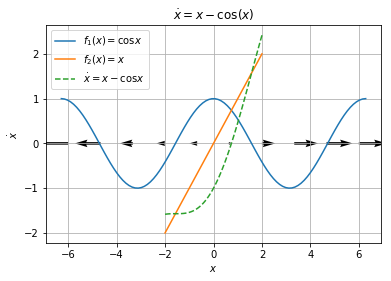

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x_1 = np.linspace(-np.pi*2, np.pi*2, 100)
y_1 = np.cos(x_1)
plt.plot(x_1, y_1, label=r'$f_1(x) = \cos x$')

x_2 = np.linspace(-2, 2, 100)
y_2 = x_2
plt.plot(x_2, y_2, label=r'$f_2(x) = x$')

def fn(x):
    y = x - np.cos(x)
    return y

x = np.linspace(-2, 2, 100)
y = fn(x)
plt.plot(x, y, label=r'$\dot{x} = x - \cos x$', linestyle='--')

x_flow = np.linspace(-6, 6, 10)
y_flow = np.repeat(0, len(x_flow))
l_flow = fn(x_flow)
plt.quiver(x_flow, y_flow, l_flow, 0)

plt.title(r'$\dot{x} = x - \cos(x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$\dot{x}$')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## 2.3 Population Growth

$$\dot{N} = rN$$

$$N(t) = N_0e^rt$$

**Carrying capacity**: $K$

**Logistic eq**
$$\dot{N} = rN \Big(1 - \frac{N}{K} \Big)$$

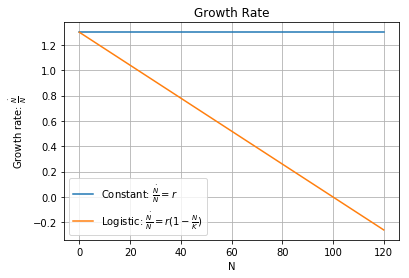

In [37]:
import matplotlib.pyplot as plt
import numpy as np

r = 1.3
K = 100

N = np.linspace(0, 120, 100)

plt.plot(N, np.repeat(r, len(N)), label='Constant: ' r'$\frac{\dot{N}}{N} = r$')

def GR(N, r, K):
    rate = r * (1 - N/K)
    return rate

rate = GR(N, r, K)

plt.plot(N, rate, label='Logistic: ' r'$\frac{\dot{N}}{N} = r(1 - \frac{N}{K})$')

plt.xlabel('N')
plt.ylabel('Growth Rate: ' r'$\frac{\dot{N}}{N}$')
plt.grid(True)
plt.legend(loc='lower left')
plt.title('Growth Rate')
plt.show()

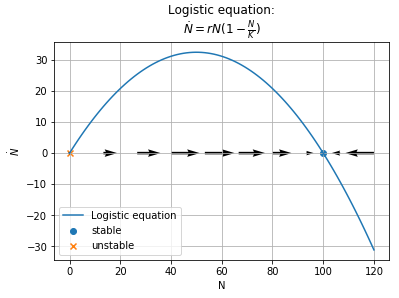

In [29]:
import matplotlib.pyplot as plt
import numpy as np

r = 1.3
K = 100

def logistic(x, r, K):
    y = r * x * (1 - x / K)
    return y

N = np.linspace(0, 120, 100)
N_dot = logistic(N, r=r, K=K)

stable = K
plt.scatter(stable, logistic(stable, r=r, K=K), label='stable', marker='o')

unstable = 0
plt.scatter(unstable, logistic(unstable, r=r, K=K), label='unstable', marker='x')

plt.plot(N, N_dot, label='Logistic equation')

x_flow = np.linspace(0, 120, 10)
y_flow = np.repeat(0, len(x_flow))
l_flow = logistic(x_flow, r=r, K=K)
plt.quiver(x_flow, y_flow, l_flow, 0)

plt.title('Logistic equation:\n'
          r'$\dot{N} = rN (1 - \frac{N}{K} )$')
plt.xlabel('N')
plt.ylabel(r'$\dot{N}$')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

### Critique of the Logistic Model

## 2.4 Linear Stability Analysis

Let 
- $x\ast$: fixed point

$$\eta(t) = x(t) - x\ast$$

$$\dot{\eta} = \frac{d}{dt} (x - x\ast) = \dot{x}$$

- $x\ast$: constant

$$\dot{\eta} = \dot{x} = f(x) = f(x\ast + \eta)$$

Taylor's expansion:
$$f(x\ast + \eta) = f(x\ast) + \eta f'(x\ast) + O(\eta^2)$$

- $O(\eta^2)$: quadratically small term in $\eta$

$$\dot{\eta} = \eta f'(x\ast) + O(\eta^2)$$

$$\dot{\eta} \approx \eta f'(x\ast)$$

**Overview**

- [2.0 Introduction](#2.0-Introduction)
- [2.1 A Geometric way of Thinking](#2.1-A-Geometric-way-of-Thinking)
- [2.2 Fixed Points and Stability](#2.2-Fixed-Points-and-Stability)
    - [Example 2.2.1](#Example-2.2.1)
    - [Example 2.2.2](#Example-2.2.2)
    - [Example 2.2.3](#Example-2.2.3)
- [2.3 Population Growth](#2.3-Population-Growth)
    - [Critique of the Logistic Model](#Critique-of-the-Logistic-Model)
- [2.4 Linear Stability Analysis](#2.4-Linear-Stability-Analysis)